#### Problem Statement:
Kickstarter is a crowdfunding website where people can ask people to invest in various projects and concept products. They have provided data having different attributes of a project like its name, category, the currency of funding, deadline for crowdfunding, goal and raised amounts for funding, etc.

 

#### Attribute information:

1. id - project id
2. name - project name
3. subcategory - project subcategory
4. category - project category
5. currency - project currency
6. deadline - deadline for crowdfunding on Kickstarter
7. goal - goal amount in project currency
8. launched - launch date on Kickstarter
9. pledged - pledged (raised) amount in the project currency
10. state - project state
11. backers - count of backers
12. country - project country
13. usd_pledged_real - pledged (raised) amount in USD
14. usd_goal_real - goal amount in USD
 

#### Kindly go through these guidelines before you attempt the quiz:

1. Use random_state=1 wherever this parameter can be used.
2. Ensure there is a proper internet connection while taking up the quiz. Any breakup in the connection will automatically submit your quiz.
3. Only attempt the quiz when you are prepared and have enough time on your hands to finish it. Please ensure you attempt the quiz well before the due date. No extension will be provided for any quiz once the deadline is passed.
4. The quiz once opened, must be completed within the time frame provided. You CANNOT start the quiz, leave it unattended for an extended period of time and come back later to finish.
5. No re-attempts will be provided if the quiz gets submitted for any of the above-mentioned reasons.
6. If you face any other technical issues on Olympus, you should share the screenshot with your Program Manager so that the team can understand and resolve it on priority.

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
df = pd.read_csv("KickStarterProjects.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 378661 rows and 14 columns.


,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
99838,1506962323,2018 Comic Con/ Horror Con/ GMCC,Art,Art,USD,10-10-2017,600.0,31-08-2017 04:05,600.00,successful,4,US,600.00,600.00
15731,1079621785,Ixion's The Four Disgracers,Theater,Theater,USD,26-04-2014,3500.0,27-03-2014 20:21,2920.00,failed,54,US,2920.00,3500.00
339459,799118140,Irving Comics Inc. (Canceled),Comics,Comics,USD,16-04-2015,10000.0,17-03-2015 20:58,75.00,canceled,1,US,75.00,10000.00
100211,1508896926,Breakaway,Shorts,Film & Video,USD,17-10-2011,5000.0,16-09-2011 20:11,5365.00,successful,60,US,5365.00,5000.00
170820,1869016023,the Atomic Café Mobile,Drinks,Food,USD,19-06-2015,5000.0,20-05-2015 10:47,5111.06,successful,53,US,5111.06,5000.00
75113,1382708884,Shaken,Dance,Dance,USD,11-04-2011,2000.0,11-03-2011 05:13,2615.00,successful,51,US,2615.00,2000.00
258934,386894220,Happiness Ambassador Postcard Project Year: 20...,Mixed Media,Art,USD,29-09-2012,800.0,15-09-2012 01:29,80.00,failed,3,US,80.00,800.00
178566,19084902,Unlikely Friends (Short Film),Drama,Film & Video,GBP,13-03-2015,150.0,03-02-2015 09:49,5.00,failed,1,GB,7.39,221.71
33859,1171932479,Would you help a MONSTER make music? Yes or No?,Classical Music,Music,USD,21-09-2014,2000.0,22-08-2014 18:01,2778.00,successful,30,US,2778.00,2000.00
278069,484824490,Dracula: Son of the Dragon,Comics,Comics,USD,17-04-2013,14000.0,18-03-2013 16:54,15172.66,successful,329,US,15172.66,14000.00


<IPython.core.display.Javascript object>

In [4]:
# to view first 5 rows of the dataset
df.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.0,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.0,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378661 non-null  object 
 3   category          378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 40.4+ MB


<IPython.core.display.Javascript object>

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,378661.0,NaN,NaN,NaN,1074731191.988755,619086204.322627,5971.0,538263516.0,1075275634.0,1610148624.0,2147476221.0
name,378657,375722,#NAME?,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subcategory,378661,159,Product Design,22314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,378661,15,Film & Video,63585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,378661,14,USD,295365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deadline,378661,3164,08-08-2014,705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goal,378661.0,NaN,NaN,NaN,49080.791521,1183391.259093,0.01,2000.0,5200.0,16000.0,100000000.0
launched,378661,347035,20-06-2017 16:00,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pledged,378661.0,NaN,NaN,NaN,9682.979339,95636.010005,0.0,30.0,620.0,4076.0,20338986.27
state,378661,6,failed,197719,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [7]:
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['name', 'subcategory', 'category', 'currency', 'deadline', 'launched',
       'state', 'country'],
      dtype='object')

<IPython.core.display.Javascript object>

In [11]:
# we will skip the title and description columns as they will have a lot of unique values
cat_col = [
    "name",
    "subcategory",
    "category",
    "currency",
    "deadline",
    "launched",
    "state",
    "country",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(dropna=False))
    print("-" * 50)

#NAME?                                        43
New EP/Music Development                      41
Canceled (Canceled)                           13
Music Video                                   11
N/A (Canceled)                                11
                                              ..
13 Men                                         1
Matt Atherton Worship Project                  1
Classic Car Sketch Art Calendar                1
Ninja Bees the Card Game                       1
Yak About Adventures, A New Zealand Roadie     1
Name: name, Length: 375723, dtype: int64
--------------------------------------------------
Product Design        22314
Documentary           16139
Music                 15727
Tabletop Games        14180
Shorts                12357
Video Games           11830
Food                  11493
Film & Video          10108
Fiction                9169
Fashion                8554
Nonfiction             8318
Art                    8253
Apparel                7166
Theat

<IPython.core.display.Javascript object>

In [9]:
df.isnull().sum().sort_values(ascending=False)

name                4
ID                  0
subcategory         0
category            0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [12]:
df = df.dropna()

<IPython.core.display.Javascript object>

In [13]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 378657 rows and 14 columns.


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='backers'>

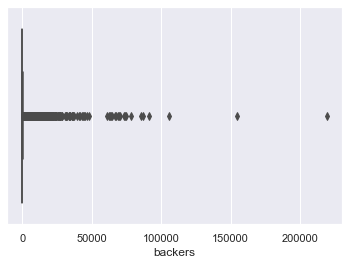

<IPython.core.display.Javascript object>

In [14]:
sns.boxplot(x=df["backers"])

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df["goal_min"] = MinMaxScaler().fit_transform(df[["goal"]])

<IPython.core.display.Javascript object>

<AxesSubplot:>

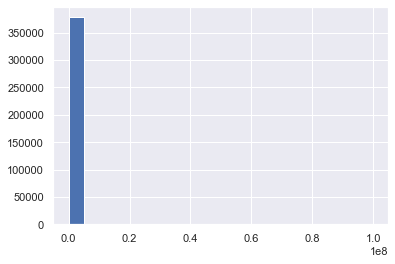

<IPython.core.display.Javascript object>

In [18]:
df["goal"].hist(bins=20)

<AxesSubplot:>

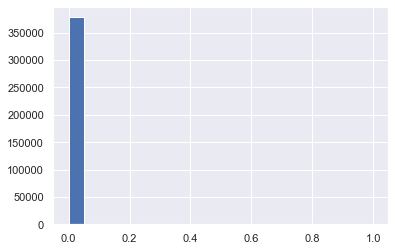

<IPython.core.display.Javascript object>

In [19]:
df["goal_min"].hist(bins=20)

In [21]:
std_scaler = StandardScaler()
df["goal_std"] = std_scaler.fit_transform(df[["goal"]])

<IPython.core.display.Javascript object>

<AxesSubplot:>

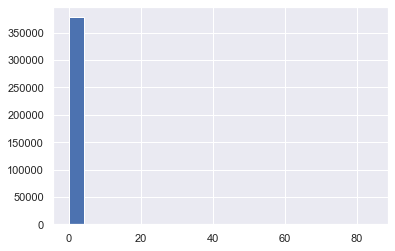

<IPython.core.display.Javascript object>

In [22]:
df["goal_std"].hist(bins=20)

<AxesSubplot:xlabel='usd_goal_real', ylabel='Count'>

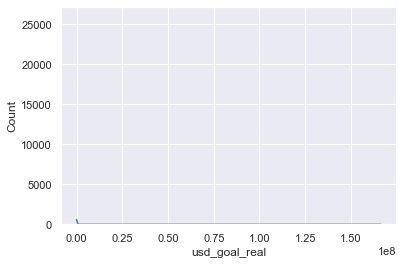

<IPython.core.display.Javascript object>

In [23]:
sns.histplot(data=df, x="usd_goal_real", multiple="dodge", kde=True)

In [24]:
df["usd_goal_real_log"] = np.log(df["usd_goal_real"])

<IPython.core.display.Javascript object>

/Users/pranabkb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='usd_goal_real_log', ylabel='Density'>

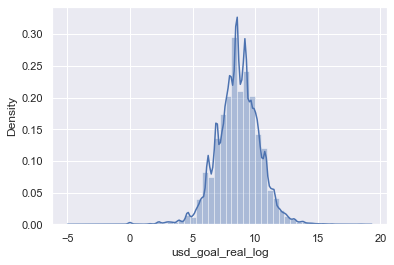

<IPython.core.display.Javascript object>

In [25]:
sns.distplot(df["usd_goal_real_log"])

In [26]:
df["launched_dt"] = pd.to_datetime(df["launched"])
df["Month"] = pd.DatetimeIndex(df["launched_dt"]).month
print(df["Month"].value_counts())

7     34477
1     34346
10    33409
3     32837
11    32135
8     31619
5     31573
9     31538
6     31381
4     31038
2     29876
12    24428
Name: Month, dtype: int64


<IPython.core.display.Javascript object>

In [27]:
df.groupby("category")["usd_pledged_real"].mean()

category
Art              3221.093567
Comics           6610.443828
Crafts           1632.907282
Dance            3452.946356
Design          24417.846732
Fashion          5712.450839
Film & Video     6158.073703
Food             5113.669716
Games           21042.491442
Journalism       2615.702568
Music            3858.367608
Photography      3571.909322
Publishing       3349.951931
Technology      21151.171165
Theater          4005.918099
Name: usd_pledged_real, dtype: float64

<IPython.core.display.Javascript object>

In [28]:
df["name"].duplicated().sum()

2935

<IPython.core.display.Javascript object>